In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [109]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

in this dataset we are having data of red and white variants of the portuguese 'vinho verde' wine.

In [4]:
df.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

in this dataset we are having all(12) numeric columns out of that 1 is our target variable('quality') and remaining (11) are our independent variables

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

here 'quality' is our target variable in which 6 unique values are present it means we have to perform classification algorithms for predicting the wines quality

In [6]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1145            8.2             0.200         0.43             2.5      0.076   
990             7.7             0.390         0.12             1.7      0.097   
607             8.8             0.480         0.41             3.3      0.092   
660             7.2             0.520         0.07             1.4      0.074   
1124            6.5             0.580         0.00             2.2      0.096   
99              8.1             0.545         0.18             1.9      0.080   
1146            7.8             0.500         0.12             1.8      0.178   
915             8.6             0.315         0.40             2.2      0.079   
545             9.1             0.470         0.49             2.6      0.094   
1077            8.6             0.370         0.65             6.4      0.080   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1145                 31.0                  51.0  0.99672  3.53       0.81   
990                  19.0                  27.0  0.99596  3.16       0.49   
607                  26.0                  52.0  0.99820  3.31       0.53   
660                   5.0                  20.0  0.99730  3.32       0.81   
1124                  3.0                  13.0  0.99557  3.62       0.62   
99                   13.0                  35.0  0.99720  3.30       0.59   
1146                  6.0                  21.0  0.99600  3.28       0.87   
915                   3.0                   6.0  0.99512  3.27       0.67   
545                  38.0                 106.0  0.99820  3.08       0.59   
1077                  3.0                   8.0  0.99817  3.27       0.58   

      alcohol  quality  
1145     10.4        6  
990       9.4        5  
607      10.5        6  
660       9.6        6  
1124     11.5        4  
99        9.0        6  
1146      9.8        6  
915      11.9        6  
545       9.1        5  
1077     11.0        5

In [7]:
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [8]:
df.shape

(1599, 12)

this dataset contains 1599 rows and 12 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


by using info method we can see the some basic information about the dataset like(data types,null values,memory usage) and the some of column numbers which belongs from different data types for example- here our all independents(11) variables present in the (float64) data type  and target variable(1) present in the (int64) datatype

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

all (11) independents varibles are continues and target variable(1) is  in the discrete format

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

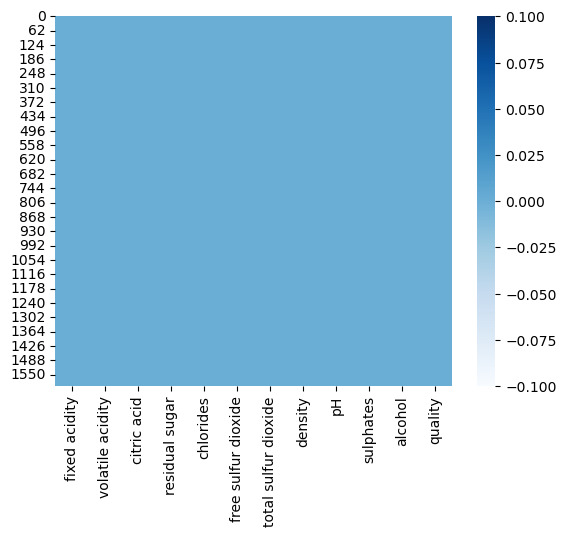

In [13]:
sns.heatmap(df.isnull(),cmap='Blues')

In [14]:
for i in df.columns:
    print(df[i].unique())
    print('\n')

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]


[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27

in this dataset we are not having any null values

In [15]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [16]:
df.nunique().to_frame('no of unique values')

no of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

this are the unique values present in the dataset

In [17]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

by using describe method we can see the some statistical values of the dataset like(mean,meadian,standard deviation)also the (25%,50%,75%,100%)percentile of the dataset and minimum or maximum values as well

in this dataset count value is same for every columns it means there is no null values present in the dataset

as we can see in the ('total sulfur dioxide') mean value is bit higher than the median value(50%)

also in  the ('fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide') columns there is bit differene in the 75% percentile and the maximum values.



# data visualization

univariate analysis

In [18]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


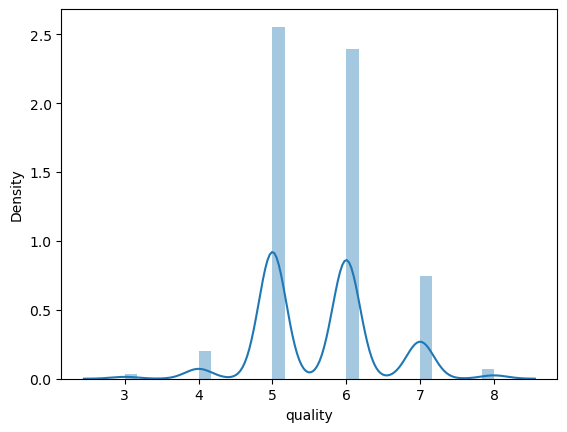

In [19]:
sns.distplot(df['quality'])
print(df['quality'].value_counts())

 the distribution of  our target variable 'quality' so the 5 and 6 repeated multiple types than the rest of the values

In [20]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

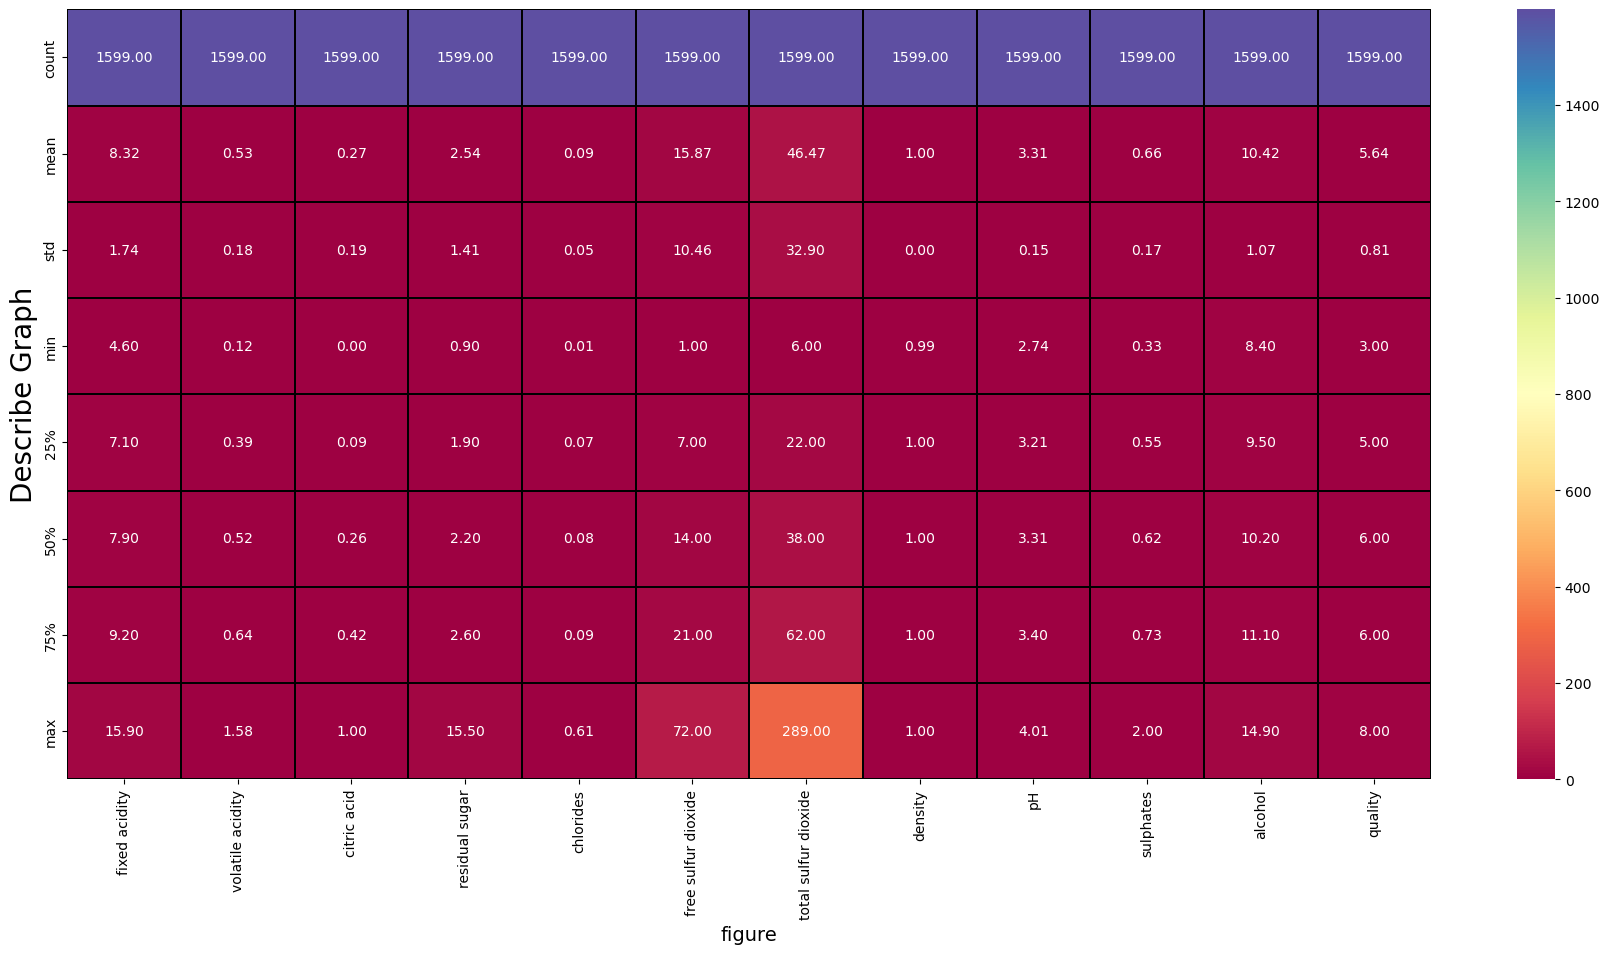

In [21]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('variables_name',fontsize=14)
plt.ylabel('Describe Graph',fontsize=20)
plt.show()

# Bivariate analysis

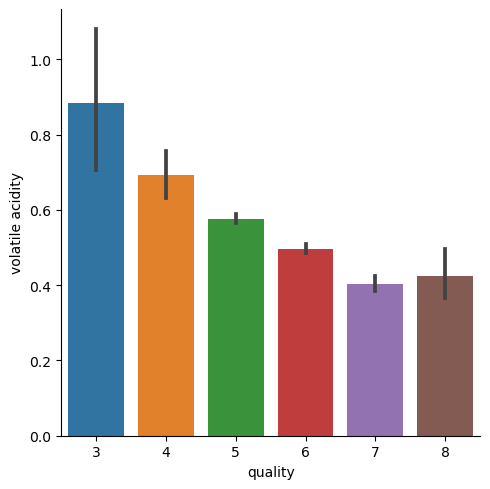

In [22]:
sns.catplot(x='quality',y='volatile acidity',data=df,kind='bar')
plt.show()

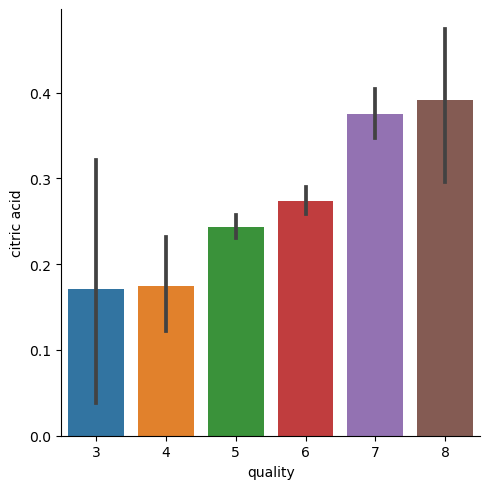

In [76]:
sns.catplot(x='quality',y='citric acid',data=df,kind='bar')

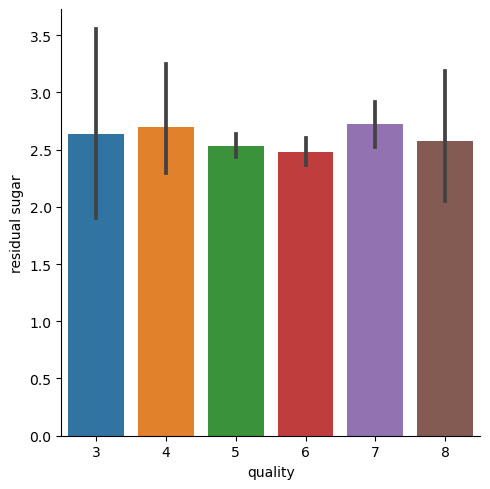

In [110]:
sns.catplot(x='quality',y='residual sugar',data=df,kind='bar')

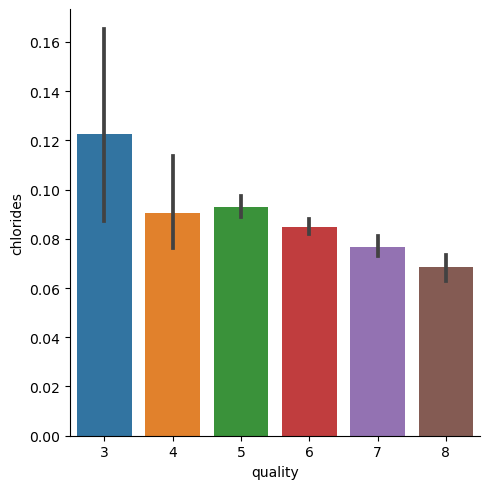

In [112]:
sns.catplot(x='quality',y='chlorides',data=df,kind='bar')


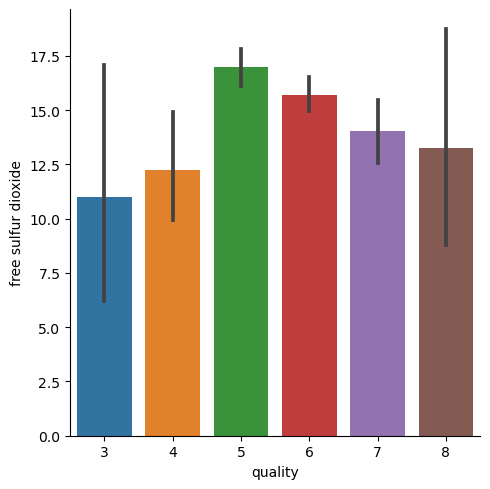

In [113]:
sns.catplot(x='quality',y='free sulfur dioxide',data=df,kind='bar')

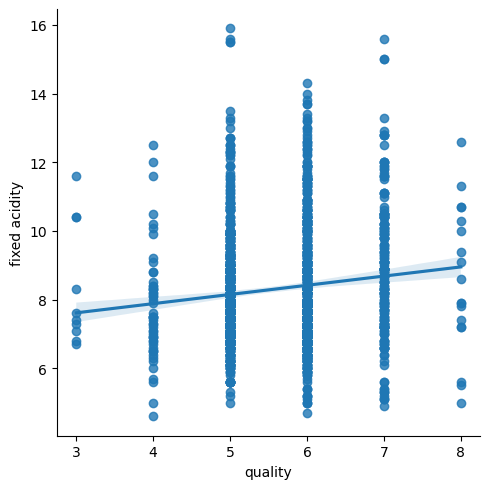

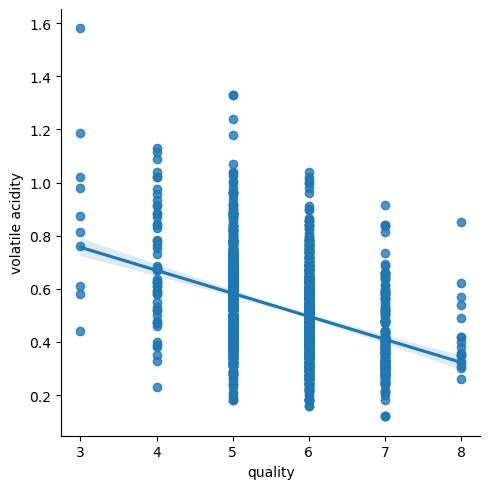

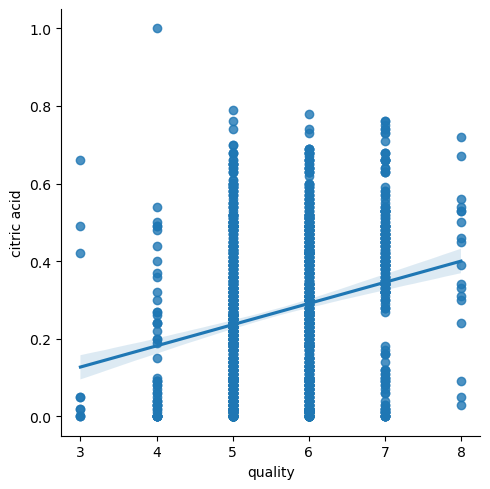

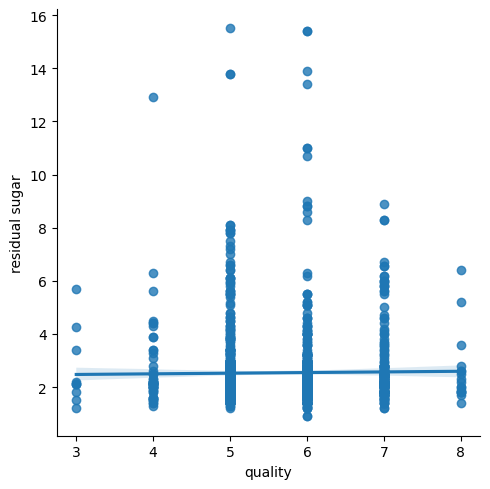

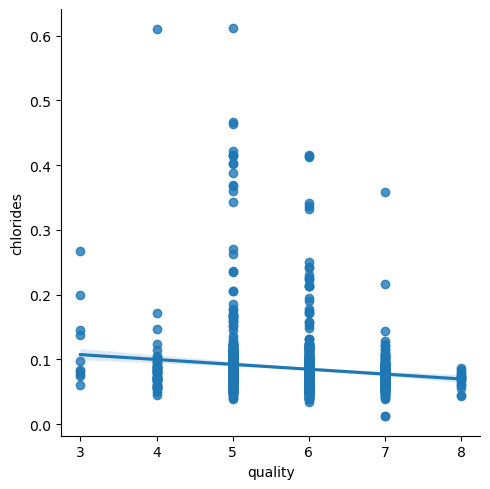

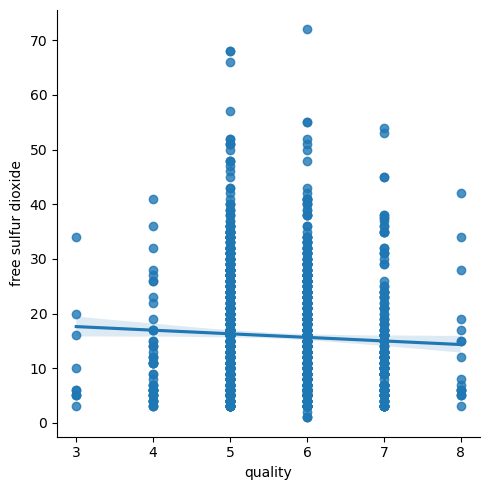

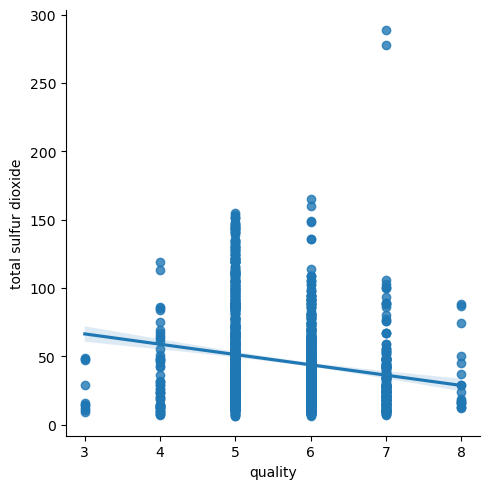

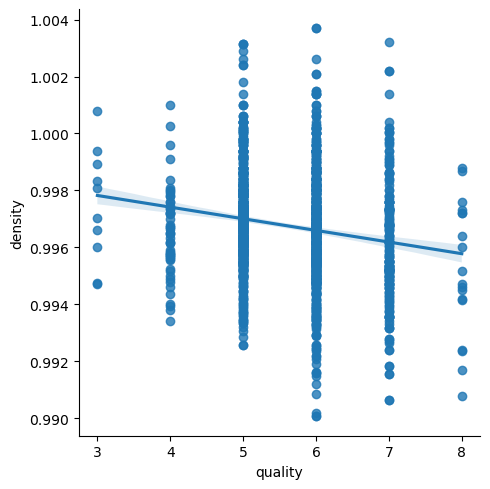

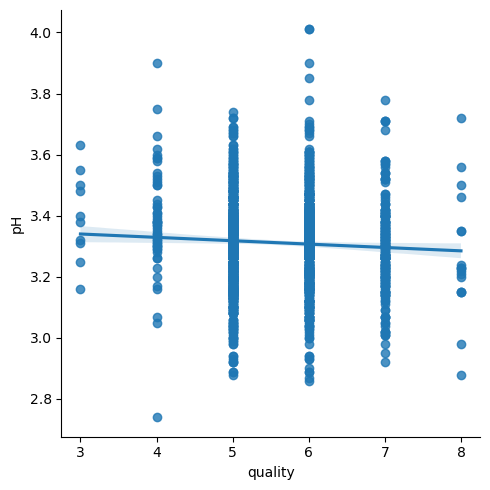

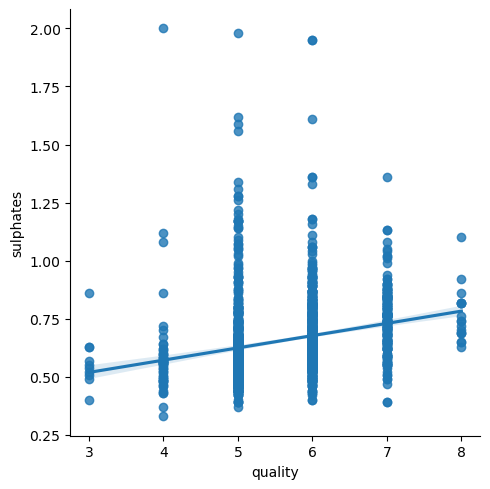

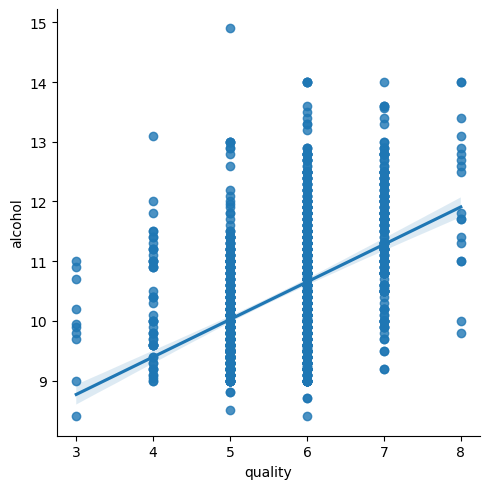

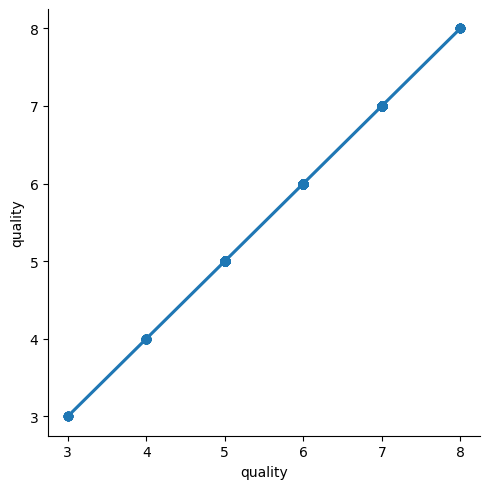

In [23]:
for i in df.columns:
    sns.lmplot(x='quality',y=i,data=df)
    plt.show()

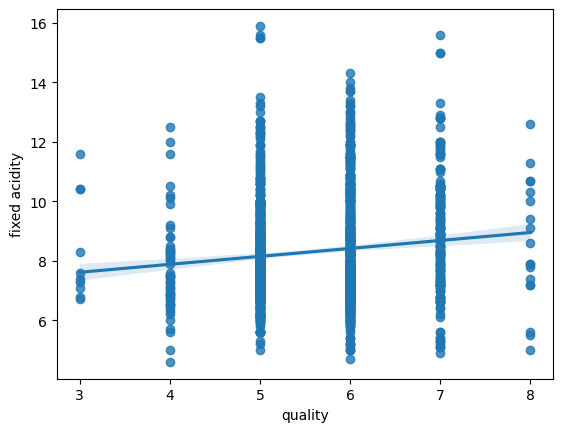

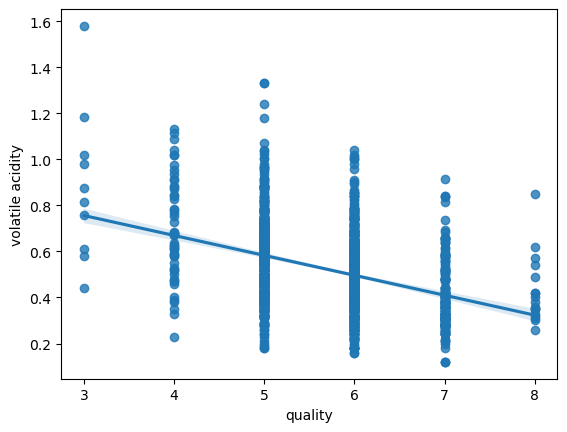

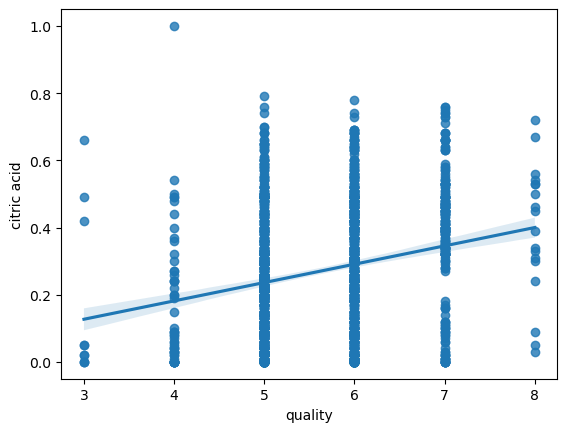

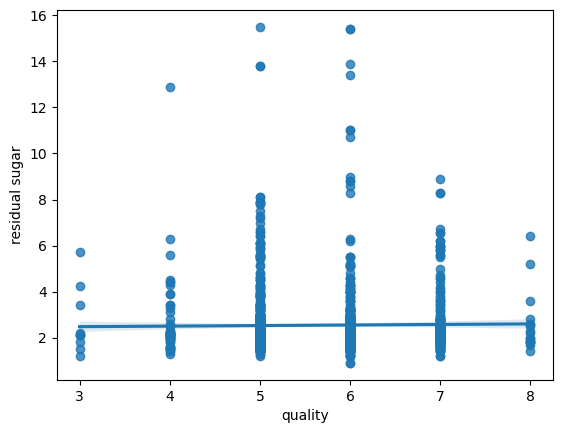

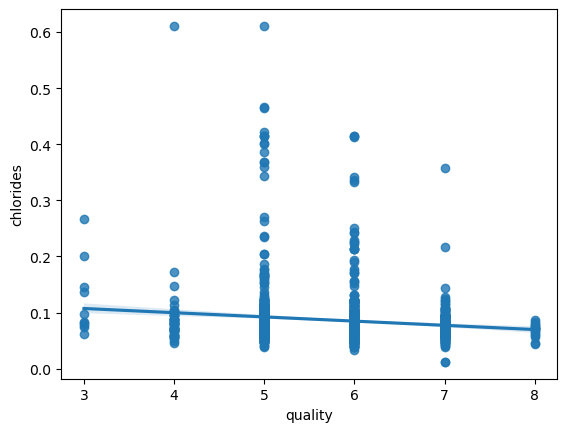

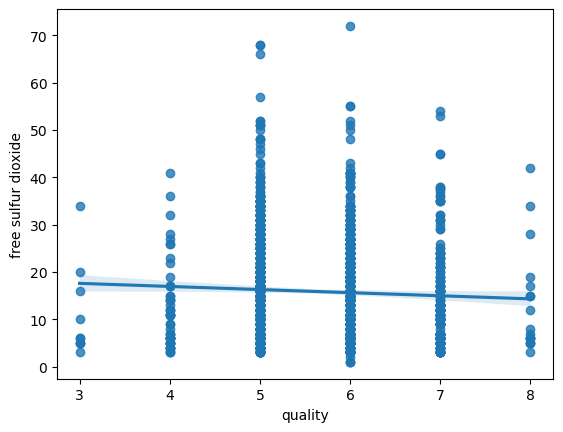

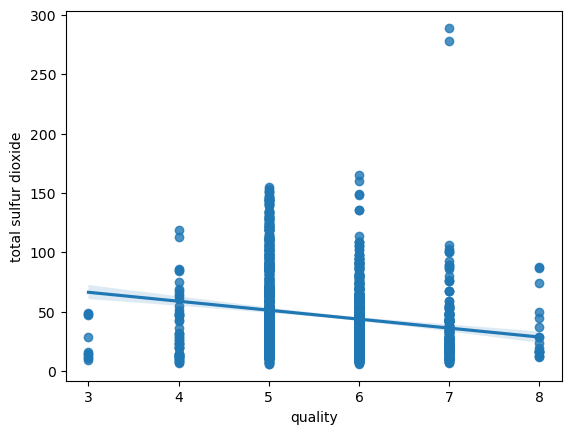

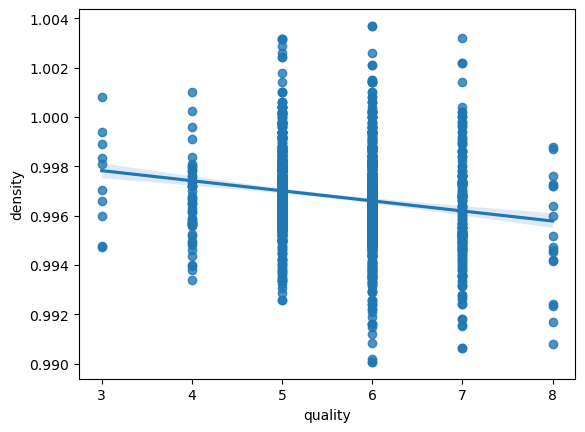

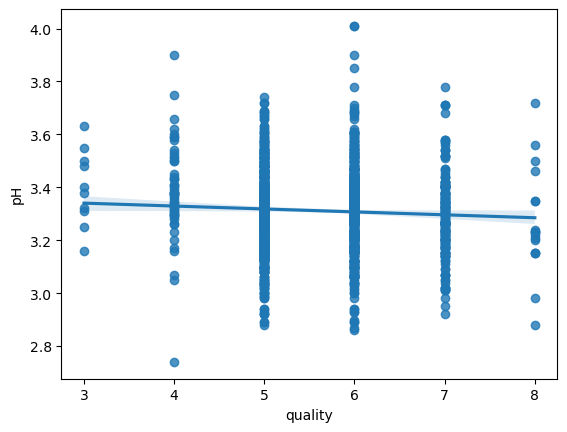

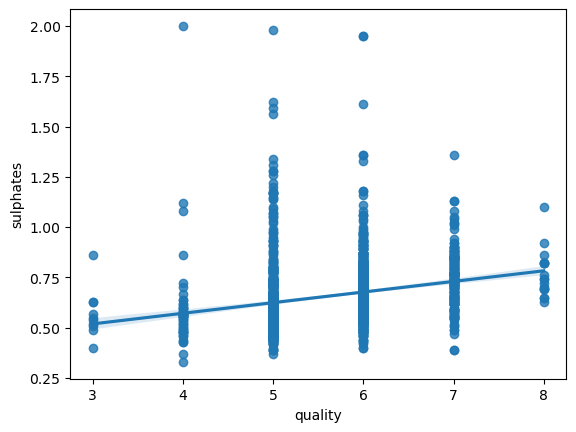

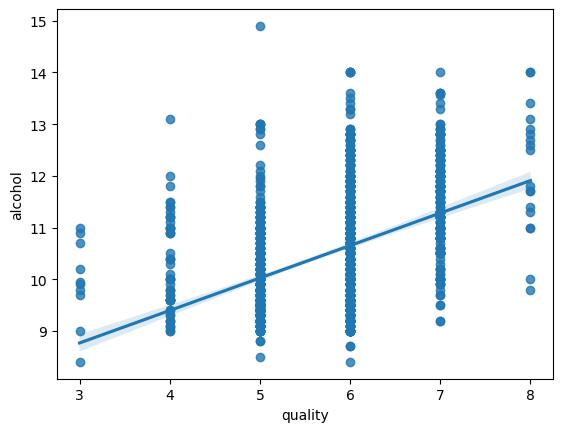

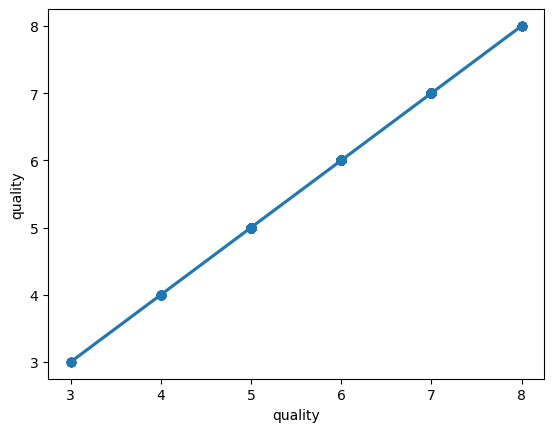

In [24]:
for i in df.columns:
    sns.regplot(x='quality',y=i,data=df)
    plt.show()

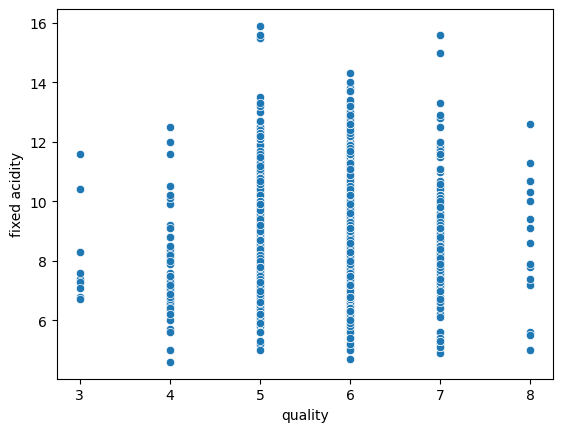

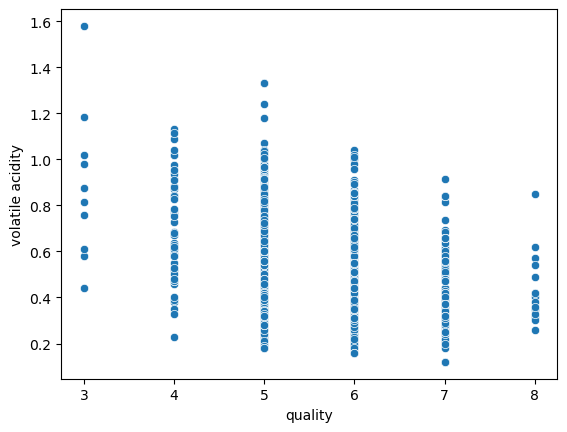

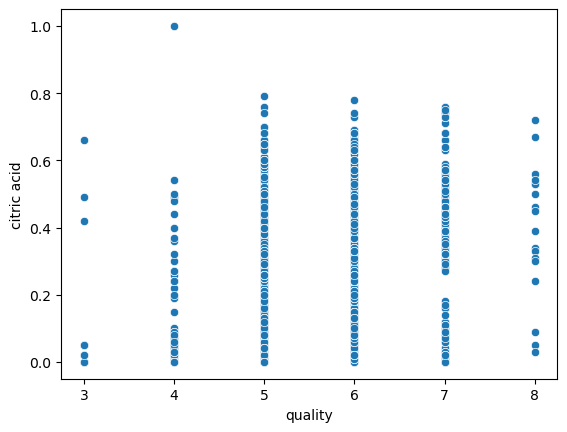

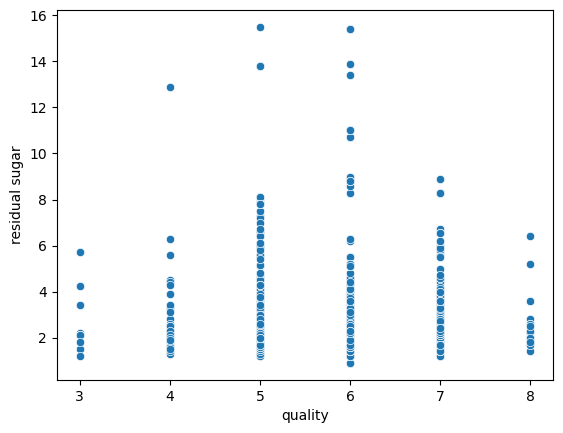

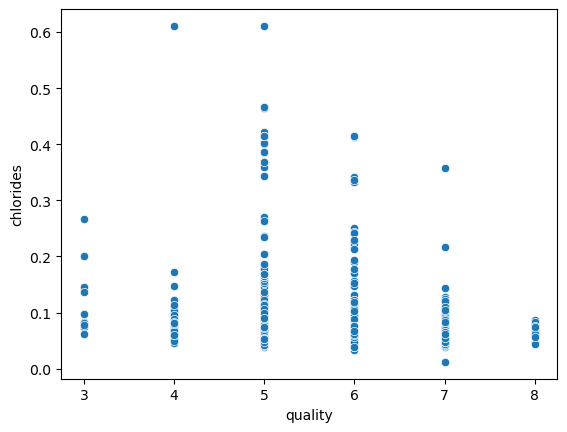

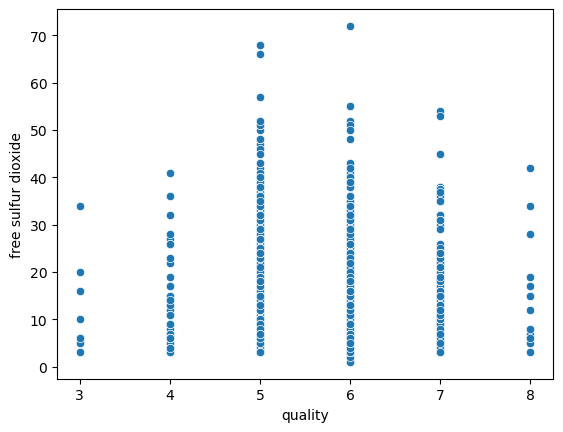

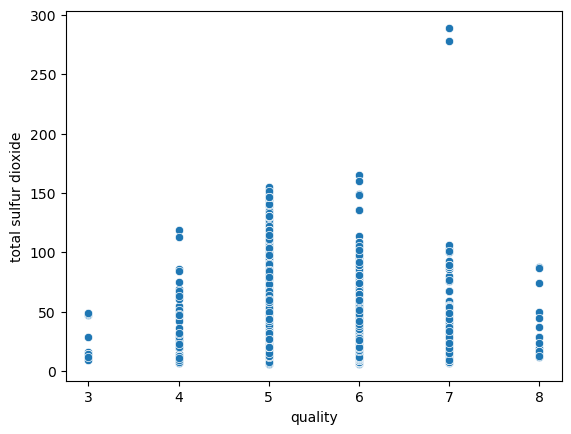

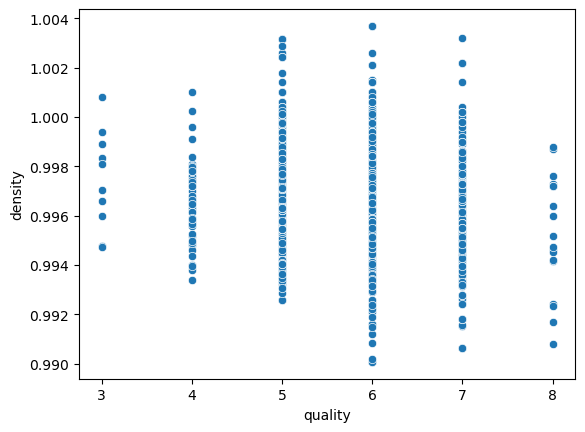

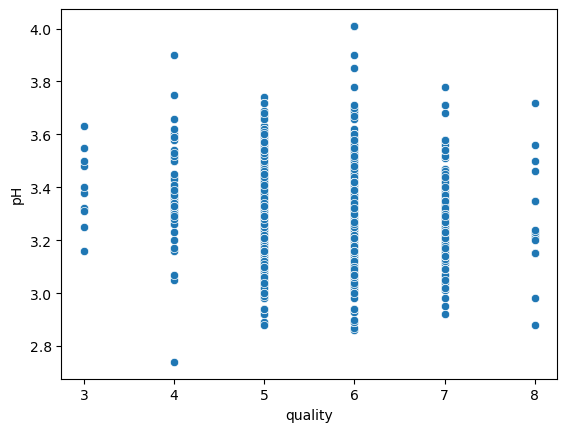

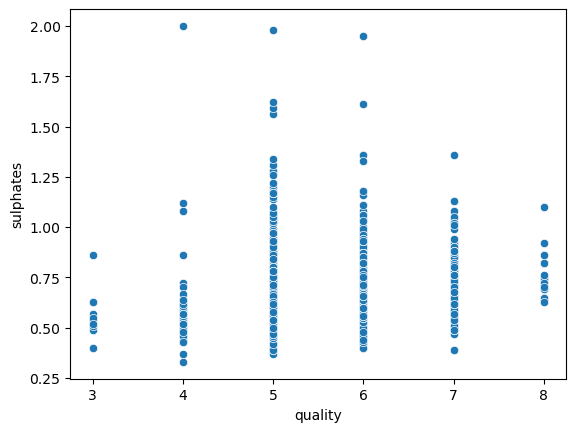

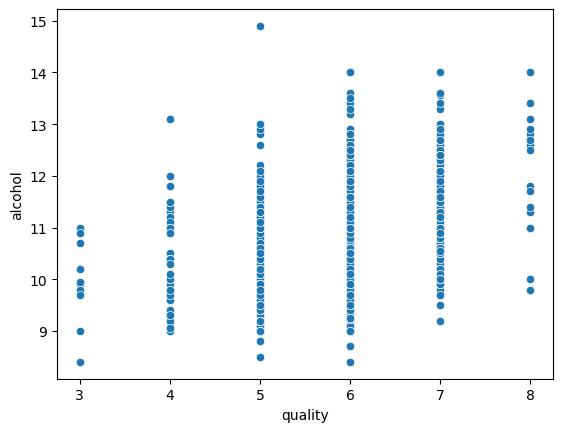

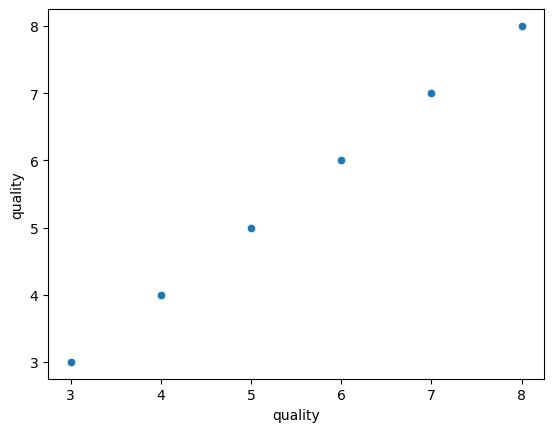

In [25]:
for i in df.columns:
    sns.scatterplot(x='quality',y=i,data=df)
    plt.show()

by looking this graphs we can conclude that the variables of the independent dataset are not that much related with the target variable

In [26]:
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

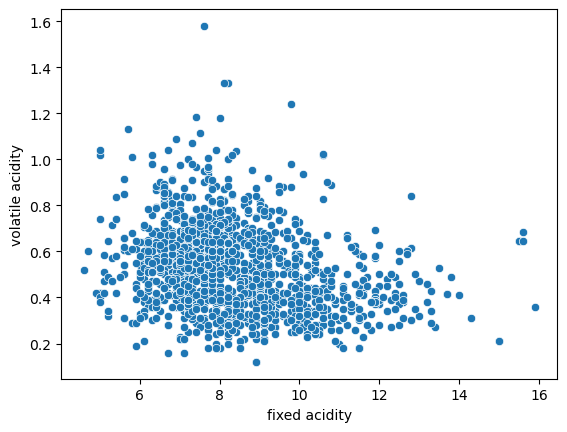

In [27]:
sns.scatterplot(x='fixed acidity',y='volatile acidity',data=df)
plt.show()

fixed acidity and volatile acidity are positively co-related

In [28]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

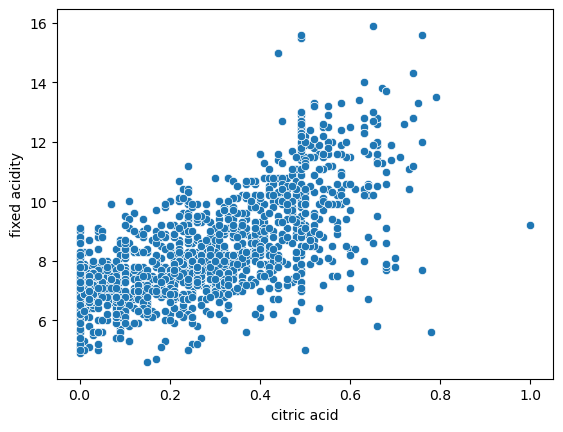

In [29]:
sns.scatterplot(x='citric acid',y='fixed acidity',data=df)
plt.show()

here we can see fixed acidity and the citric acid are strong positively co-related

In [30]:
df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

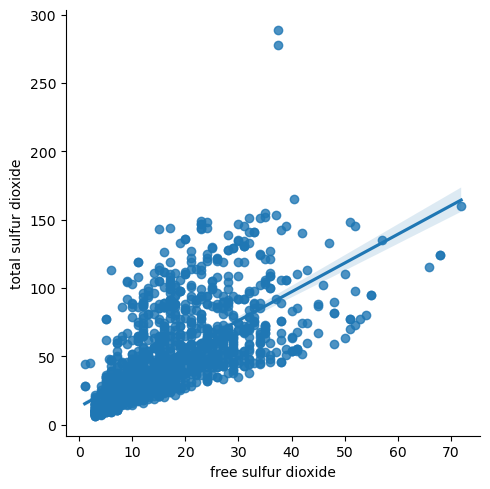

In [31]:
sns.lmplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df)
plt.show()

total sulfur dioxide and the free sulfur dioxide both are also positively co-related  

In [32]:
df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

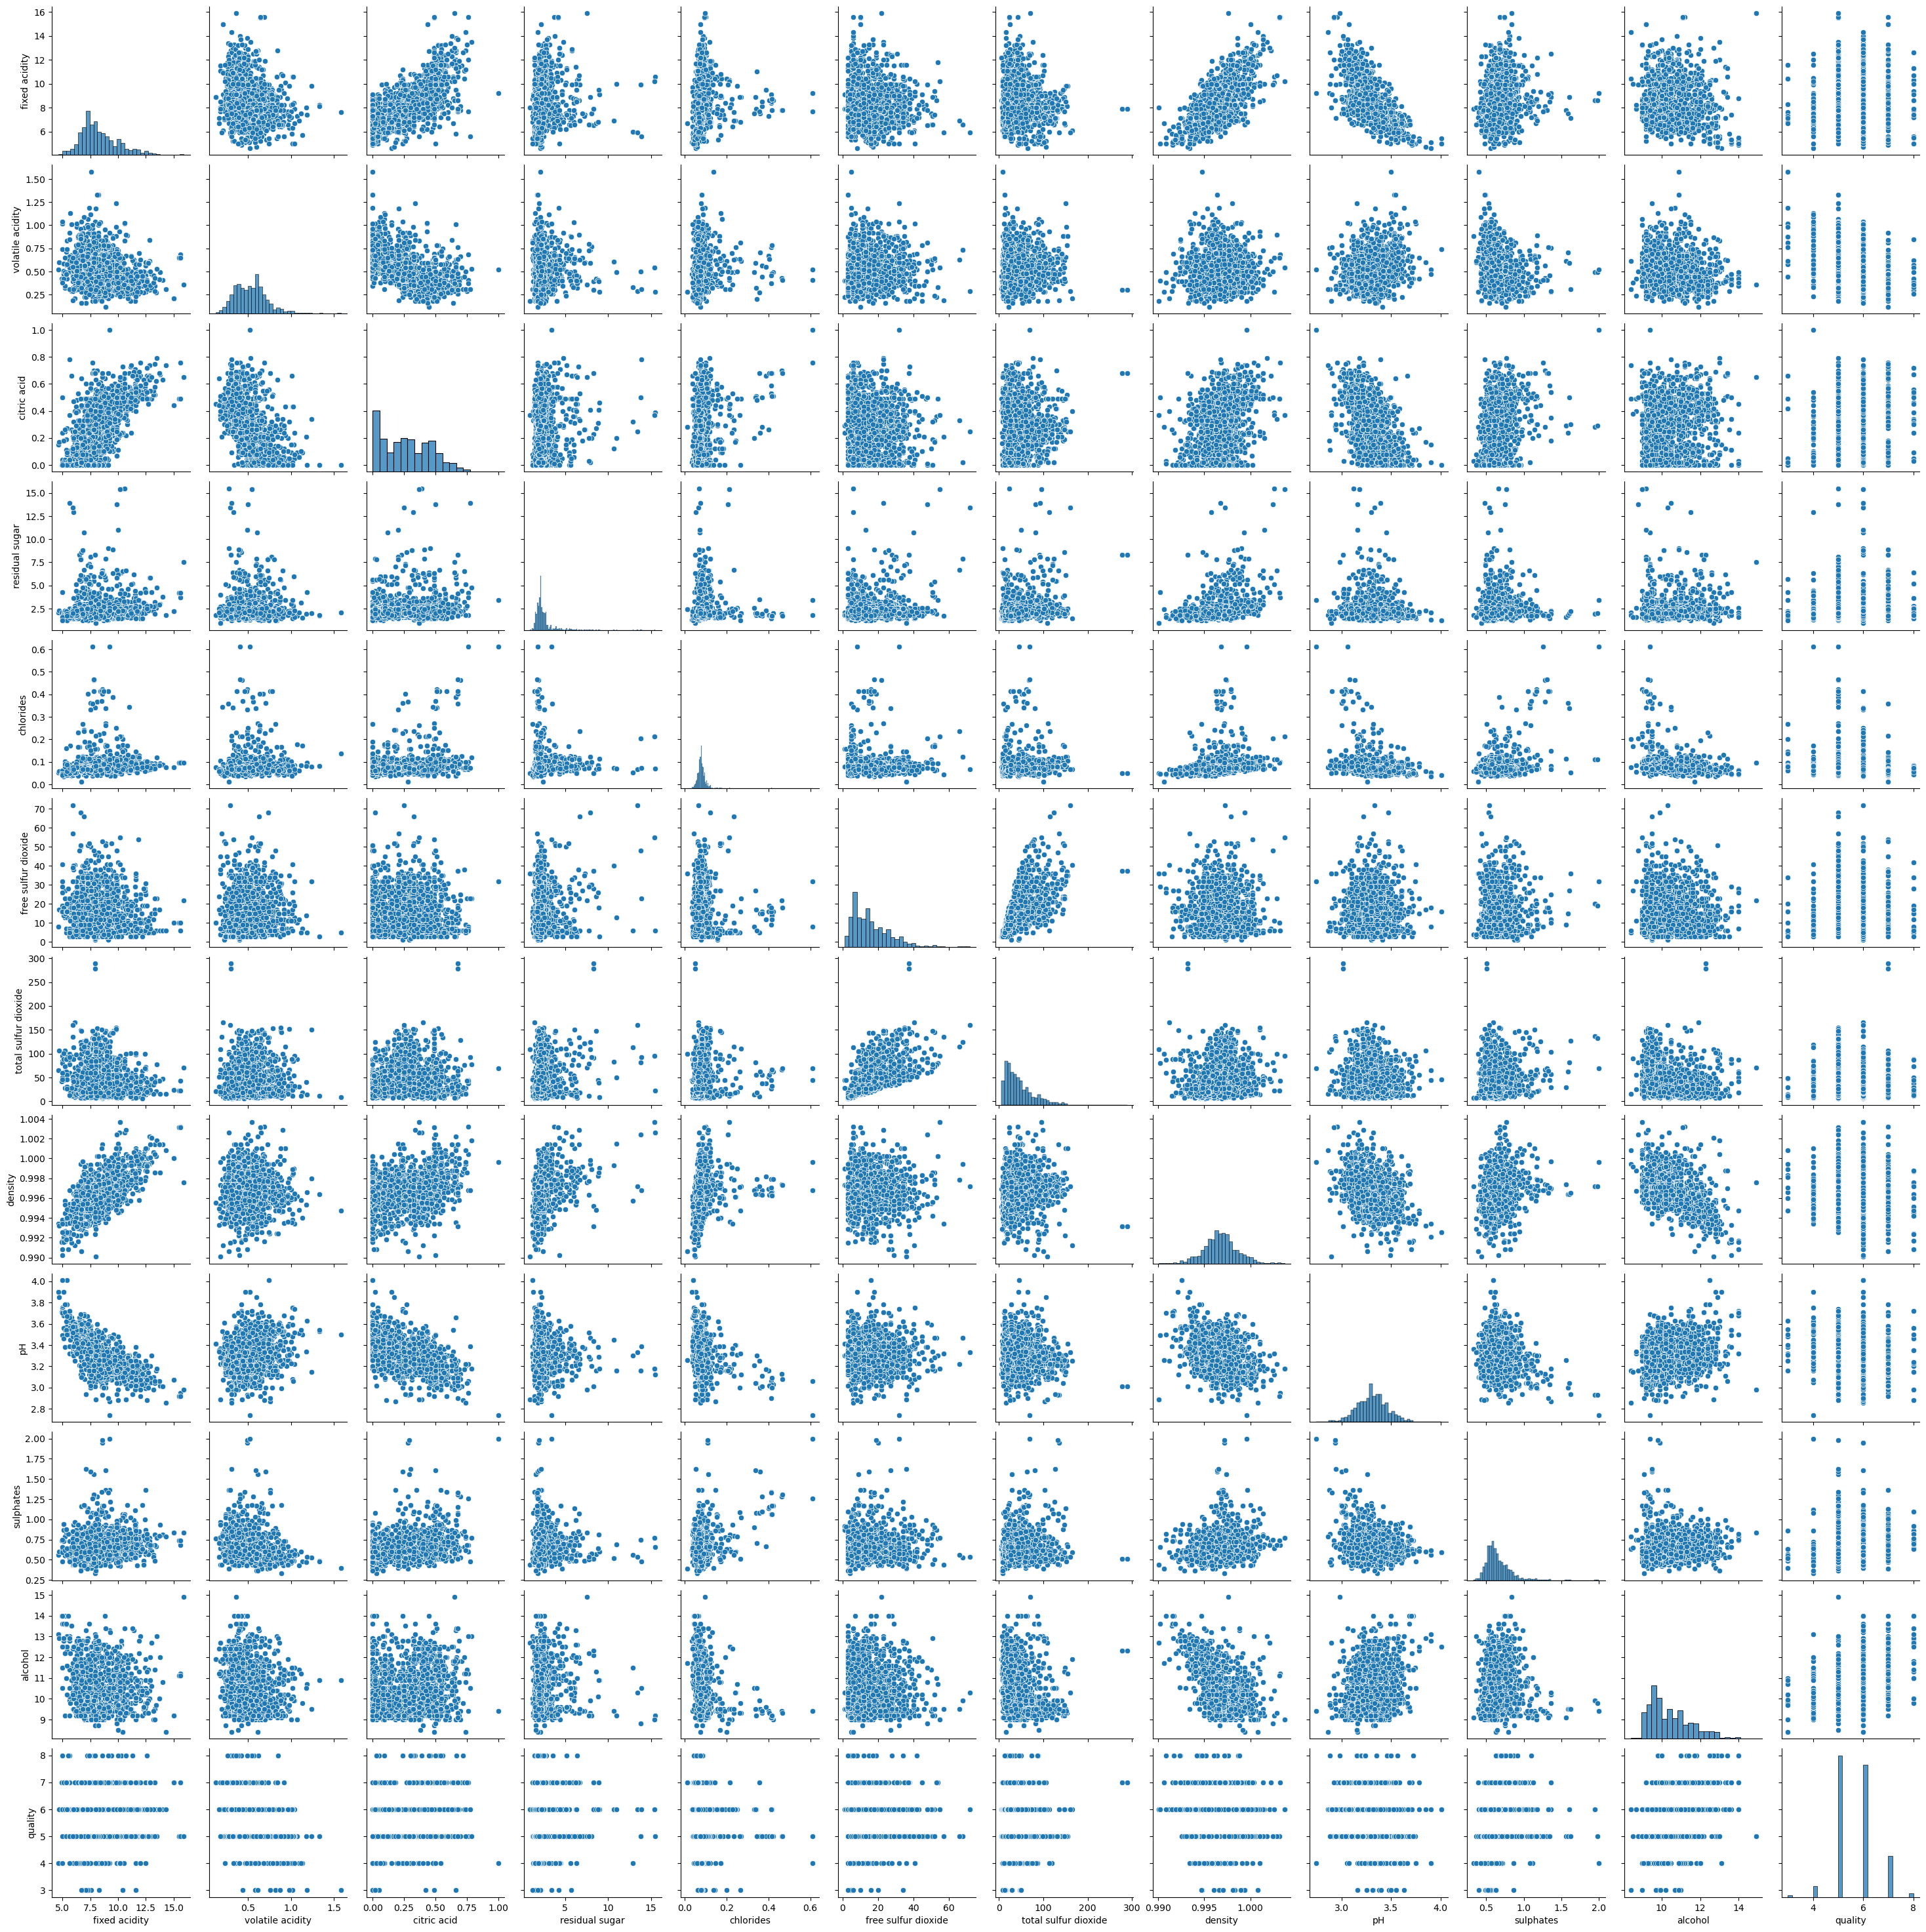

In [33]:
sns.pairplot(df)

this is the pair plot of our wine dataset by using this graph we can see the relation of whole dataset and as well as the distribution of the variables also.

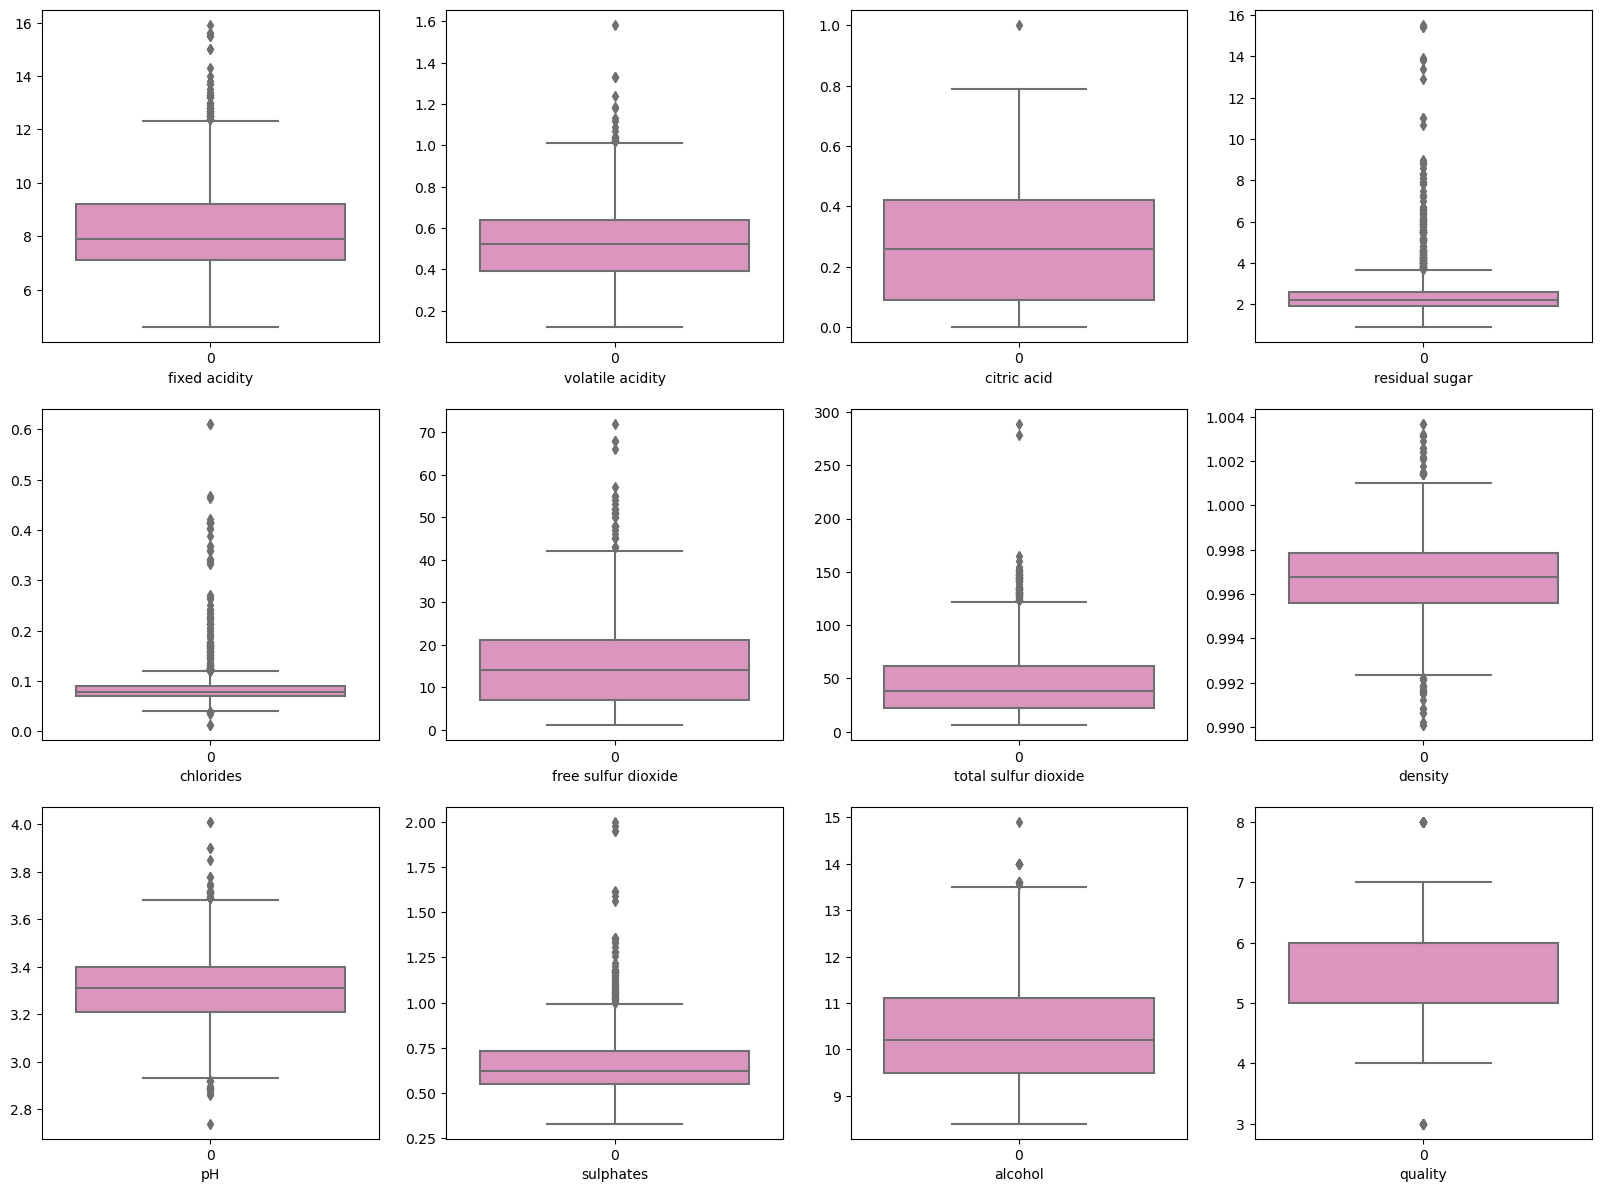

In [34]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<15:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
    
plt.show()

in this boxplot it is looking in our dataset outliers are present in most of the columns (almost all columns) 

# removing outliers

In [35]:
ind_var=df.iloc[:,:-1]
z=np.abs(zscore(ind_var))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [36]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [37]:
df_new=df[(z<3).all(axis=1)]


In [38]:
df_new.shape

(1458, 12)

In [39]:
print('old dataset',df.shape)
print('new dataset',df_new.shape)

print('Data Loss percentage-',((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

old dataset (1599, 12)
new dataset (1458, 12)
Data Loss percentage- 8.818011257035648


as we can see the difference between the old and new dataset after removing the outliers
and their values

# checking skewness

In [40]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

# we have removed the skewness

In [41]:
df_new['residual sugar']=np.log(df['residual sugar'])
#df_new['chlorides']=np.sqrt(df['chlorides'])
#df_new['total sulfur dioxide']=np.sqrt(df['total sulfur dioxide'])

In [42]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

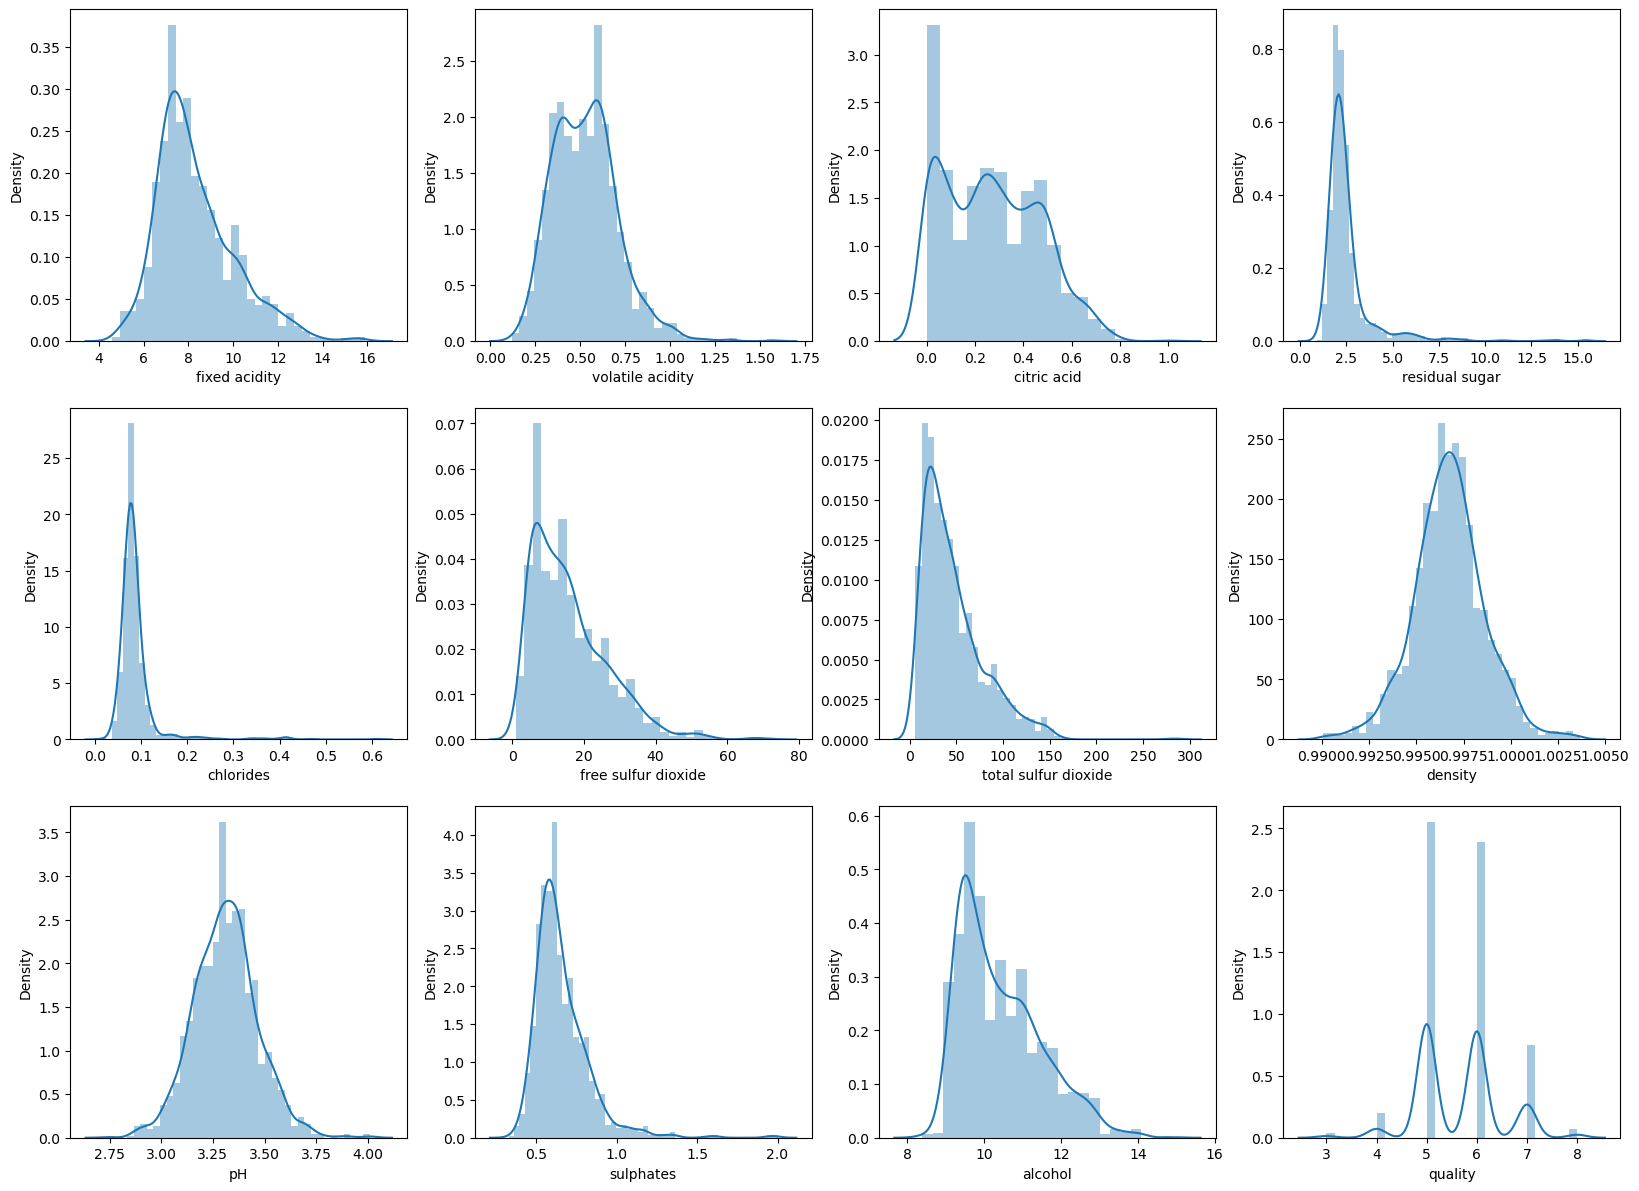

In [43]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<15:
        plt.subplot(5,4,p)
        sns.distplot(df[i])
        plt.xlabel(i)
        
    p+=1
    
plt.show()

# now it looks almost normal distribution

now we will check the correlation between the features using corr()

In [44]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

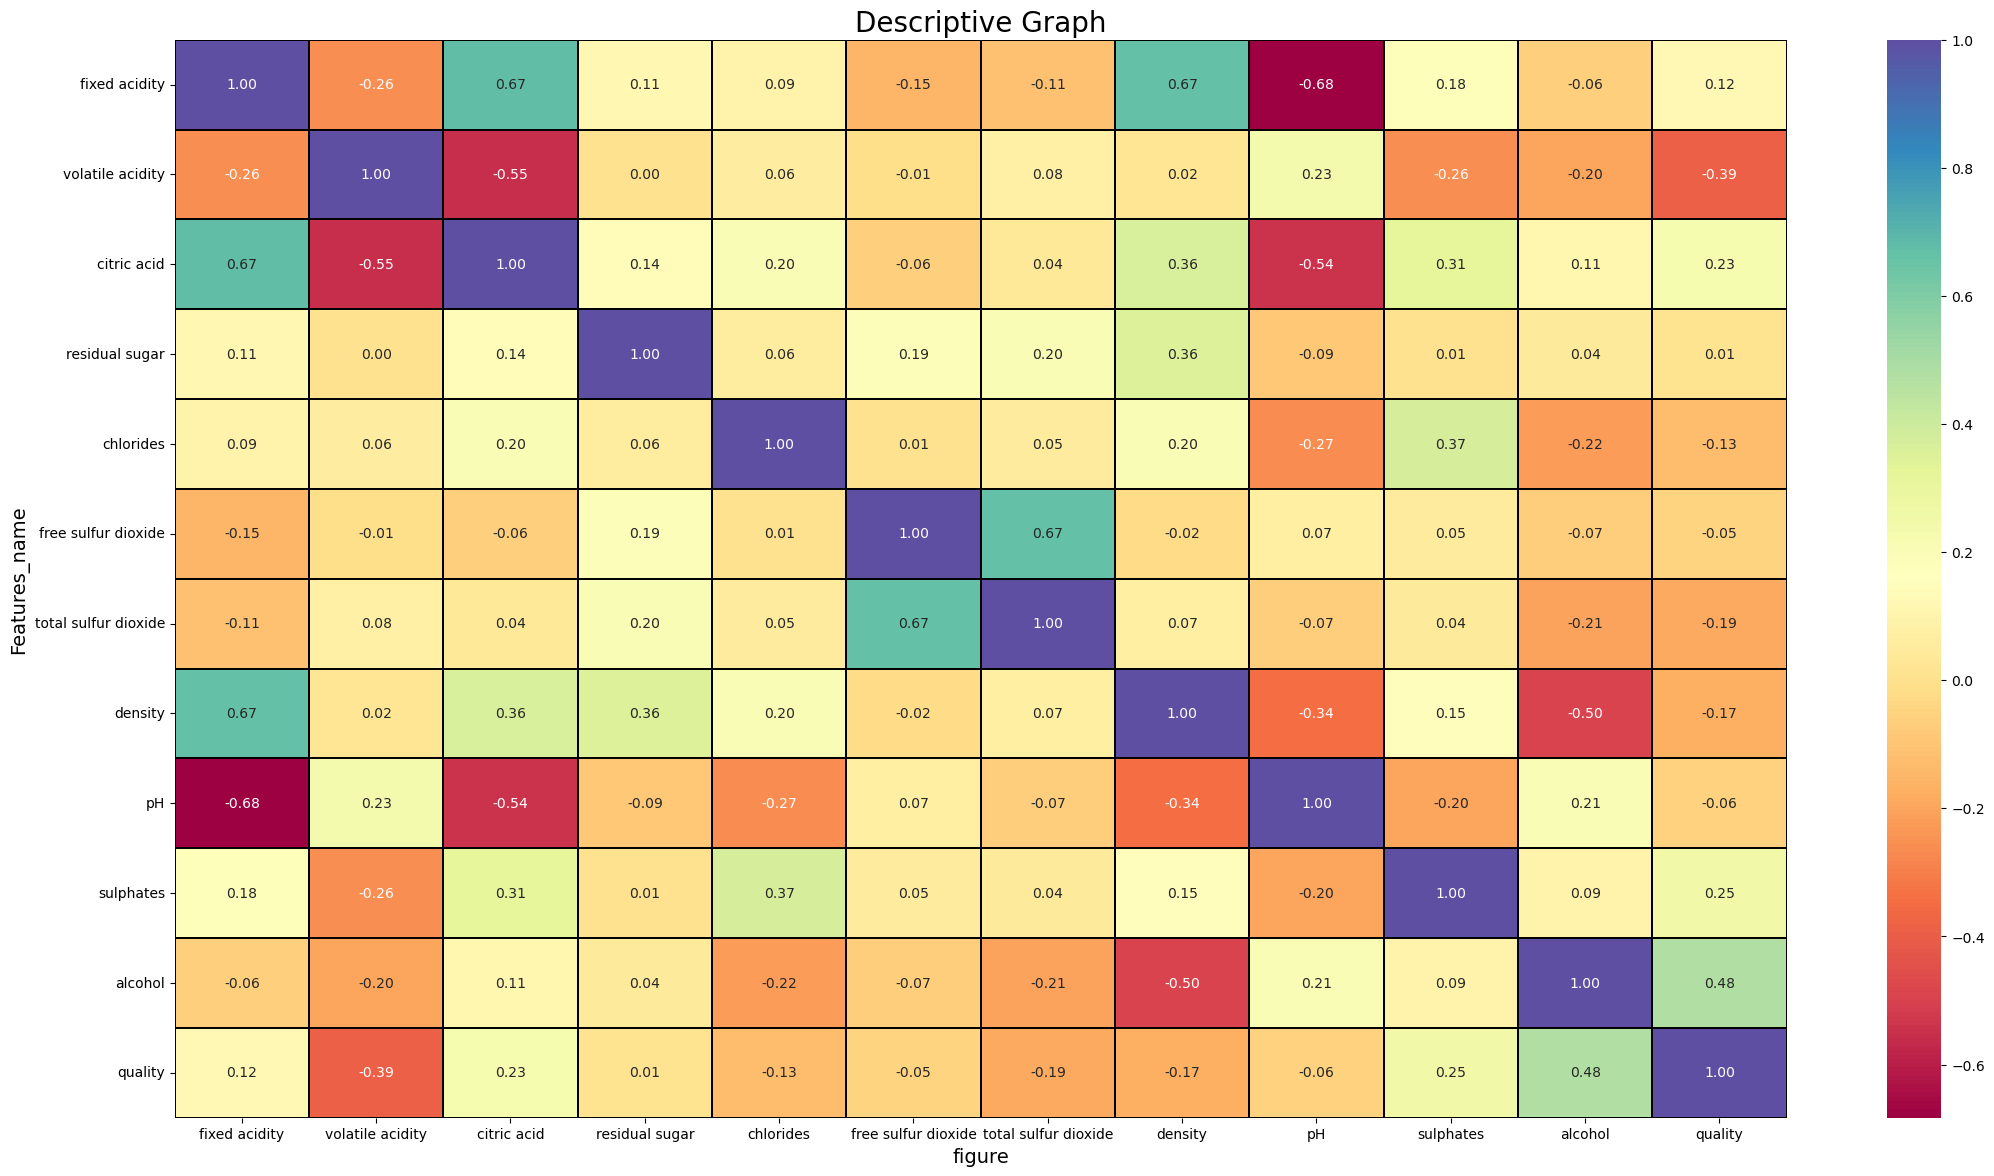

In [45]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('Features_name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [46]:
df_new['quality']=[1 if x>=7 else 0 for x in df_new['quality']]

In [47]:
df_new['quality'].value_counts()

0    1257
1     201
Name: quality, dtype: int64

# separeting features and label

In [48]:
x=df_new.drop('quality',axis=1)
y=df_new['quality']

print('feature Dimension=',x.shape)
print('feature Dimension',y.shape)

feature Dimension= (1458, 11)
feature Dimension (1458,)


# feature scalling

by using standard scaler so we can scale down the data so then the model will give the same level of priority to each feature it will help to increase the performance of the model

In [49]:
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.554045          1.038708    -1.387413       -0.621768  -0.260755   
1         -0.311190          2.101325    -1.387413        0.456376   0.776445   
2         -0.311190          1.392914    -1.178214        0.034952   0.493572   
3          1.753082         -1.440732     1.541370       -0.621768  -0.307900   
4         -0.554045          1.038708    -1.387413       -0.621768  -0.260755   
...             ...               ...          ...             ...        ...   
1453      -1.282612          0.448365    -0.969015       -0.445456   0.399281   
1454      -1.464753          0.153194    -0.864416       -0.117843  -0.920791   
1455      -1.221898         -0.082944    -0.707517        0.034952  -0.260755   
1456      -1.464753          0.714019    -0.759816       -0.445456  -0.307900   
1457      -1.404040         -1.263630     1.070673        1.574960  -0.685064   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.439085             -0.328538  0.629873  1.374768   
1                1.063952              0.793739  0.047678 -0.823752   
2               -0.009646              0.351630  0.164117 -0.398232   
3                0.205073              0.555680  0.746312 -1.107432   
4               -0.439085             -0.328538  0.629873  1.374768   
...                   ...                   ...       ...       ...   
1453             1.815470              0.011546 -1.058494  0.949248   
1454             2.566989              0.249605 -0.930411  1.445688   
1455             1.493391             -0.124487 -0.569449  0.736488   
1456             1.815470              0.011546 -0.726642  1.800288   
1457             0.312433             -0.056471 -0.714998  0.523728   

      sulphates   alcohol  
0     -0.635382 -0.996573  
1      0.289771 -0.604915  
2      0.058483 -0.604915  
3     -0.481190 -0.604915  
4     -0.635382 -0.996573  
...         ...       ...  
1453  -0.481190  0.080487  
1454   0.906541  0.765889  
1455   0.829444  0.570060  
1456   0.521060 -0.213256  
1457   0.135579  0.570060  

[1458 rows x 11 columns]

# checking variance inflation factor 

In [50]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len((x.columns)))]
vif

variables  vif values
0          fixed acidity    7.974099
1       volatile acidity    1.867627
2            citric acid    3.195347
3         residual sugar    1.826928
4              chlorides    1.169885
5    free sulfur dioxide    1.935869
6   total sulfur dioxide    2.194888
7                density    6.826357
8                     pH    3.202983
9              sulphates    1.322592
10               alcohol    3.447758

by checking the variance inflation factor so the 'fixed acidity' value is high than the other features for resolving the multicollinearity issues  we are going to drop the 'fixed acidity' column  let.s check 

In [51]:
x=x.drop('fixed acidity',axis=1)

In [52]:
# x=x.drop('fixed acidity',axis=1)
x.head(3)


volatile acidity  citric acid  residual sugar  chlorides  \
0          1.038708    -1.387413       -0.621768  -0.260755   
1          2.101325    -1.387413        0.456376   0.776445   
2          1.392914    -1.178214        0.034952   0.493572   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.439085             -0.328538  0.629873  1.374768  -0.635382   
1             1.063952              0.793739  0.047678 -0.823752   0.289771   
2            -0.009646              0.351630  0.164117 -0.398232   0.058483   

    alcohol  
0 -0.996573  
1 -0.604915  
2 -0.604915

we have dropped 'fixed acidity' column again check the variance_inflation_factor 

In [53]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

variables  vif values
0      volatile acidity    1.863611
1           citric acid    2.859080
2        residual sugar    1.565804
3             chlorides    1.153990
4   free sulfur dioxide    1.920996
5  total sulfur dioxide    2.108052
6               density    2.788882
7                    pH    1.518454
8             sulphates    1.308630
9               alcohol    2.437053

here we have resolved the multicoliniarity issues

# oversampling

In [54]:
from  imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [55]:
y.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

here we have done the oversampling

# modeling

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxaccu = acc
        max = i
print('Best accuracy is ',maxAccu,'at random_state',maxRS)

Best accuracy is  0 at random_state 0


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# random forest classifier

In [59]:
RD=RandomForestClassifier()
RD.fit(x_train,y_train)
predRD=RD.predict(x_test)
print(accuracy_score(y_test,predRD))
print(confusion_matrix(y_test,predRD))
print(classification_report(y_test,predRD))

0.9430463576158941
[[341  35]
 [  8 371]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       376
           1       0.91      0.98      0.95       379

    accuracy                           0.94       755
   macro avg       0.95      0.94      0.94       755
weighted avg       0.95      0.94      0.94       755



the accuracy score using random forest is 69.86% percentile

# support vector machine

In [60]:
svc=SVC()
svc.fit(x_train,y_train)
predSVC=svc.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8807947019867549
[[318  58]
 [ 32 347]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       376
           1       0.86      0.92      0.89       379

    accuracy                           0.88       755
   macro avg       0.88      0.88      0.88       755
weighted avg       0.88      0.88      0.88       755



# DecisionTreeClassifier

In [61]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8927152317880794
[[325  51]
 [ 30 349]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       376
           1       0.87      0.92      0.90       379

    accuracy                           0.89       755
   macro avg       0.89      0.89      0.89       755
weighted avg       0.89      0.89      0.89       755



# KNighbors Classifier

In [62]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8860927152317881
[[293  83]
 [  3 376]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       376
           1       0.82      0.99      0.90       379

    accuracy                           0.89       755
   macro avg       0.90      0.89      0.88       755
weighted avg       0.90      0.89      0.88       755



# ExtraTreesClassifier

In [63]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9549668874172186
[[350  26]
 [  8 371]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       376
           1       0.93      0.98      0.96       379

    accuracy                           0.95       755
   macro avg       0.96      0.95      0.95       755
weighted avg       0.96      0.95      0.95       755



# AdaBoostClassifier

In [64]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8622516556291391
[[303  73]
 [ 31 348]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       376
           1       0.83      0.92      0.87       379

    accuracy                           0.86       755
   macro avg       0.87      0.86      0.86       755
weighted avg       0.87      0.86      0.86       755



# GradientBoostingClassifier

In [65]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.9019867549668874
[[321  55]
 [ 19 360]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       376
           1       0.87      0.95      0.91       379

    accuracy                           0.90       755
   macro avg       0.91      0.90      0.90       755
weighted avg       0.91      0.90      0.90       755



# cross validation score

In [66]:
score1=cross_val_score(RD,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between accuracy score and cross validation score is',accuracy_score(y_test,predRD)-score1.mean())

[0.95228628 0.89463221 0.95029821 0.87475149 0.91832669]
0.9180589768163925
difference between accuracy score and cross validation score is 0.02498738079950158


In [67]:
score2=cross_val_score(DTC,x,y,cv=10)
print(score2)
print(score2.mean())
print('difference between accuracy score and cross validation score is',accuracy_score(y_test,predDTC)-score2.mean())

[0.86904762 0.90873016 0.8531746  0.86904762 0.95219124 0.87250996
 0.88446215 0.86055777 0.92430279 0.83266932]
0.8826693227091633
difference between accuracy score and cross validation score is 0.010045909078916115


In [68]:
score3=cross_val_score(KNN,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between accuracy score and cross validation score is',accuracy_score(y_test,predKNN)-score3.mean())

[0.92047714 0.82306163 0.87276342 0.81510934 0.83665339]
0.8536129834538585
difference between accuracy score and cross validation score is 0.03247973177792962


In [69]:
score4=cross_val_score(svc,x,y,cv=5)
print(score4)
print(score4.mean())
print('difference between accuracy score and cross validation',accuracy_score(y_test,predSVC)-score4.mean())

[0.94234592 0.8111332  0.90059642 0.81312127 0.84860558]
0.863160479354946
difference between accuracy score and cross validation 0.017634222631808916


In [70]:
score5=cross_val_score(ETC,x,y,cv=5)
print(score5)
print(score5.mean())
print('difference between accuracy score and cross validation',accuracy_score(y_test,predETC)-score5.mean())

[0.97813121 0.89860835 0.95029821 0.88667992 0.93824701]
0.9303929411578338
difference between accuracy score and cross validation 0.024573946259384805


In [71]:
score6=cross_val_score(ABC,x,y,cv=5)
print(score6)
print(score6.mean())
print('difference between accuracy score and cross validation',accuracy_score(y_test,predABC)-score6.mean())

[0.88667992 0.86083499 0.88071571 0.80119284 0.83067729]
0.8520201500162372
difference between accuracy score and cross validation 0.01023150561290187


In [72]:
score7=cross_val_score(GBC,x,y,cv=5)
print(score7)
print(score7.mean())
print('difference between accuracy score and cross validation ',accuracy_score(y_test,predGBC))

[0.90059642 0.86878728 0.90854871 0.83101392 0.88047809]
0.8778848819433994
difference between accuracy score and cross validation  0.9019867549668874


after doing the cross validation our ExtraTreesClassifier model is  giving the high accuracy score than the other models 
so now we will put this model for hyper parameter tunning

In [73]:
# extratreesclassifier
parameters=({'criterion':['gini','entropy'],
            'random_state':[10,50,100],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]})

In [74]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)


In [75]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [77]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 100}

In [81]:
Final_model1=ExtraTreesClassifier(criterion='entropy',max_depth=10,n_estimators=100,n_jobs=-2,random_state=50)
Final_model1.fit(x_train,y_train)
pred1=Final_model1.predict(x_test)

acc=accuracy_score(y_test,pred1)
print(acc*100)

90.86092715231788


In [87]:
Final_model2=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=100)
Final_model2.fit(x_train,y_train)
pred2=Final_model2.predict(x_test)
acc=accuracy_score(y_test,pred2)
print(acc*100)

95.36423841059603


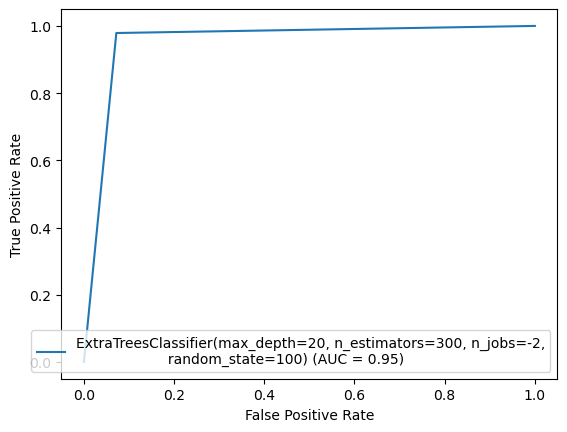

In [97]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred2)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model2)
display.plot()

In [99]:
# saving  the model 
import joblib
joblib.dump(Final_model2,'red_and_white_wine_quality.pkl')

['red_and_white_wine_quality.pkl']

In [105]:
# Lets Load the saved model AND get the predictions
reload_model=joblib.load('red_and_white_wine_quality.pkl')

# pred
prediction= reload_model.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

# difference between the actual value and the predicted value

In [106]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0            1         1
1            0         0
2            1         1
3            1         1
4            1         1
..         ...       ...
750          1         1
751          1         1
752          1         1
753          1         1
754          1         1

[755 rows x 2 columns]